In [103]:
import pandas as pd
import numpy as np 
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [106]:
x = data.drop('labels',axis=1)
x1 = data.loc[:,'V1']
x2 = data.loc[:,'V2']
y = data.loc[:,'labels']
x.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [109]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [112]:
pd.value_counts(y)
# pd.value_counts(x)
# 这里是类别分类统计

2    1156
1     954
0     890
Name: labels, dtype: int64

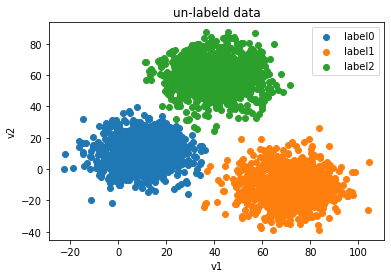

In [115]:
from matplotlib import pyplot as plt

fig1 = plt.figure()
label0 =  plt.scatter(x1[y==0],x2[y==0])
label1 =  plt.scatter(x1[y==1],x2[y==1])
label2 =  plt.scatter(x1[y==2],x2[y==2])
plt.title('un-labeld data')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [118]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

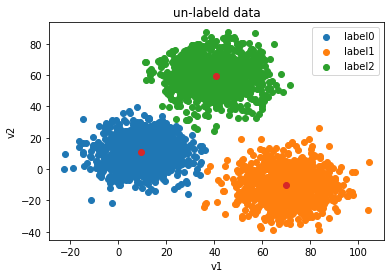

In [121]:
centers = KM.cluster_centers_

fig3 =plt.figure()
label0 =  plt.scatter(x1[y==0],x2[y==0])
label1 =  plt.scatter(x1[y==1],x2[y==1])
label2 =  plt.scatter(x1[y==2],x2[y==2])
plt.title('un-labeld data')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [124]:
y_predict = KM.predict([[80,60]])
print(y_predict)

[1]


In [127]:
y_predict = KM.predict(x)
print(pd.value_counts(y_predict))

1    1149
0     952
2     899
dtype: int64


In [130]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)
# 因为类别不同，所以准确率很低

1.0


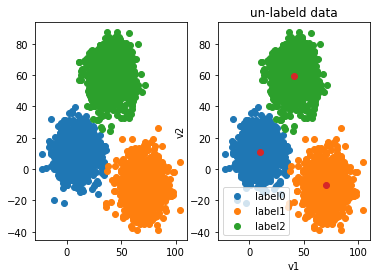

In [133]:
fig4 =plt.subplot(121)
label0 =  plt.scatter(x1[y_predict==0],x2[y_predict==0])
label1 =  plt.scatter(x1[y_predict==1],x2[y_predict==1])
label2 =  plt.scatter(x1[y_predict==2],x2[y_predict==2])

fig5 =plt.subplot(122)
label0 =  plt.scatter(x1[y==0],x2[y==0])
label1 =  plt.scatter(x1[y==1],x2[y==1])
label2 =  plt.scatter(x1[y==2],x2[y==2])

plt.title('un-labeld data')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [ ]:
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(1)
    elif i == 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_predict),pd.value_counts(y))

In [137]:
print(accuracy_score(y,y_corrected))

0.0


In [139]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [141]:
y_predict_test = KNN.predict([[80,60]])
print(y_predict_test)
y_predict = KNN.predict(x)
print(accuracy_score(y,y_predict))

[2]
1.0


In [143]:
print(pd.value_counts(y_predict),pd.value_counts(y))

2    1156
1     954
0     890
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


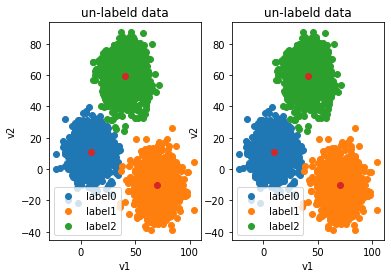

In [145]:
fig7 =plt.subplot(121)
label0 =  plt.scatter(x1[y_predict==0],x2[y_predict==0])
label1 =  plt.scatter(x1[y_predict==1],x2[y_predict==1])
label2 =  plt.scatter(x1[y_predict==2],x2[y_predict==2])
plt.title('un-labeld data')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig8 =plt.subplot(122)
label0 =  plt.scatter(x1[y==0],x2[y==0])
label1 =  plt.scatter(x1[y==1],x2[y==1])
label2 =  plt.scatter(x1[y==2],x2[y==2])

plt.title('un-labeld data')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [146]:
from sklearn.cluster import MeanShift,estimate_bandwidth
bandwidth = estimate_bandwidth(x,n_samples=500)
print(bandwidth)

30.84663454820215


In [147]:
meanshift =MeanShift(bandwidth=bandwidth)
meanshift.fit(x)

MeanShift(bandwidth=30.84663454820215, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
y_predict_ms = meanshift.predict(x)
print(y_predict_ms,pd.value_counts(y_predict_ms),pd.value_counts(y))
print(accuracy_score(y,y_predict_ms))

In [154]:
y_predict_ms_corrected = []
for i in y_predict_ms:
    if i == 0:
        y_predict_ms_corrected.append(2)
    elif i == 1:
        y_predict_ms_corrected.append(1)
    else:
        y_predict_ms_corrected.append(0)
print(accuracy_score(y,y_predict_ms_corrected))

0.997
